In [306]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/test.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/sampleSubmission.csv


In [307]:
train = pd.read_csv('../input/bike-sharing-demand/train.csv')
test = pd.read_csv('../input/bike-sharing-demand/test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Now we will convert the current datetime column into Machine Learning friendly format i.e Year, Month, Day, Hour.

In [308]:
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['month'] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['day'] = [t.day for t in pd.DatetimeIndex(train.datetime)]
train['hour'] = [t.hour for t in pd.DatetimeIndex(train.datetime)]

test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['month'] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['day'] = [t.day for t in pd.DatetimeIndex(test.datetime)]
test['hour'] = [t.hour for t in pd.DatetimeIndex(test.datetime)]

In [309]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In above output we can see we converted the datetime column in Machine Learning firendly format now we will drop the datetime column

In [310]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

In [311]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


**Data Visualisation**

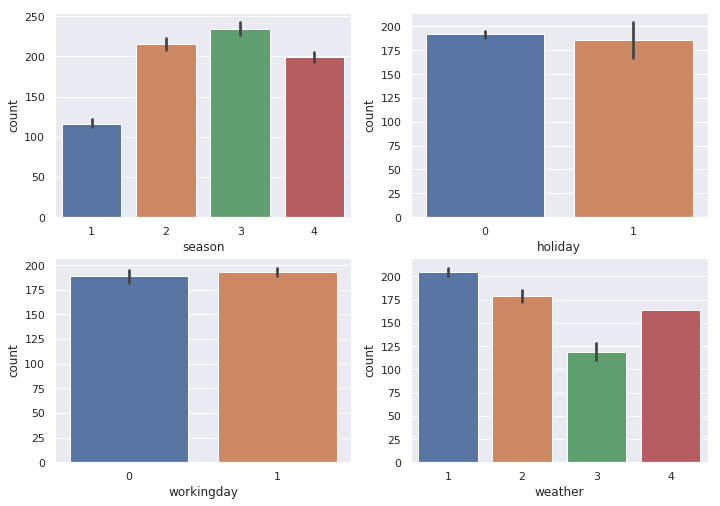

In [312]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(2,2)
sns.barplot(train['season'],train['count'],ax=ax[0,0]);
sns.barplot(train['holiday'],train['count'],ax=ax[0,1]);
sns.barplot(train['workingday'],train['count'],ax=ax[1,0]);
sns.barplot(train['weather'],train['count'],ax=ax[1,1]);

The above plots show us intuitively how count parameter differs with workingday, weather, season, holiday

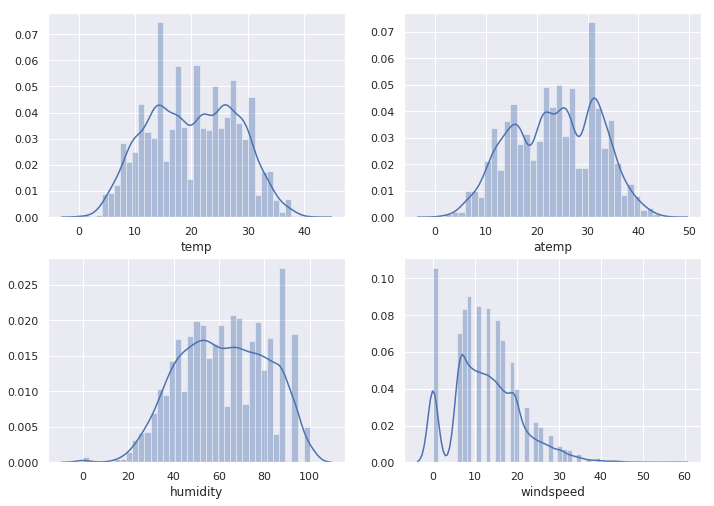

In [313]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(2,2)
sns.distplot(train['temp'],ax=ax[0,0]);
sns.distplot(train['atemp'],ax=ax[0,1]);
sns.distplot(train['humidity'],ax=ax[1,0]);
sns.distplot(train['windspeed'],ax=ax[1,1]);

This are distribution plot of humidity, windspeed, temp and atemp

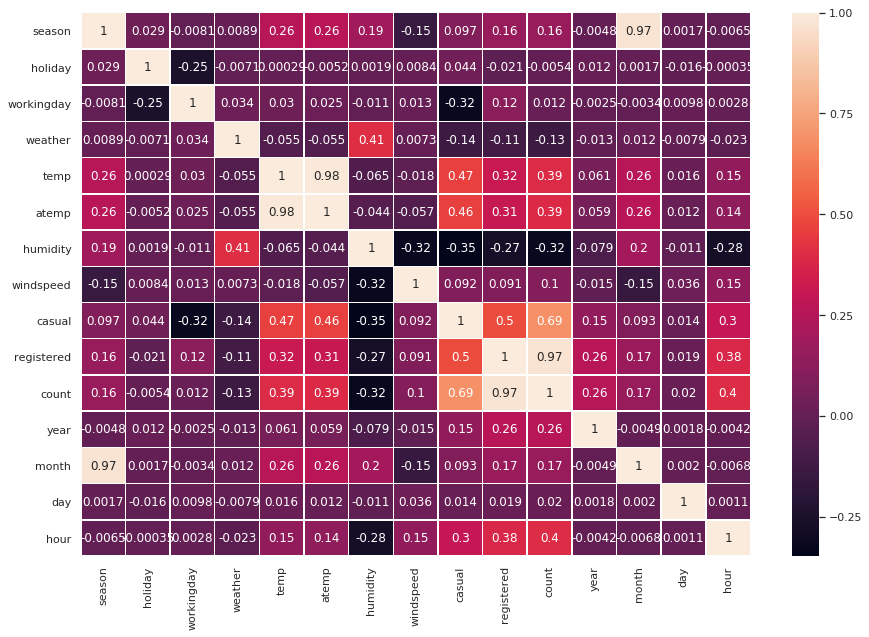

In [314]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(train.corr(),annot=True,linewidths=0.5);

In [315]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [316]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


We cans see that registered/casual is highly correlated with the count which means most of the bike were registered.

In [317]:
train.drop(['casual','registered'],axis=1,inplace=True)
#test.drop(['casual','registered'],axis=1,inplace=True)

**Correlation Plot**

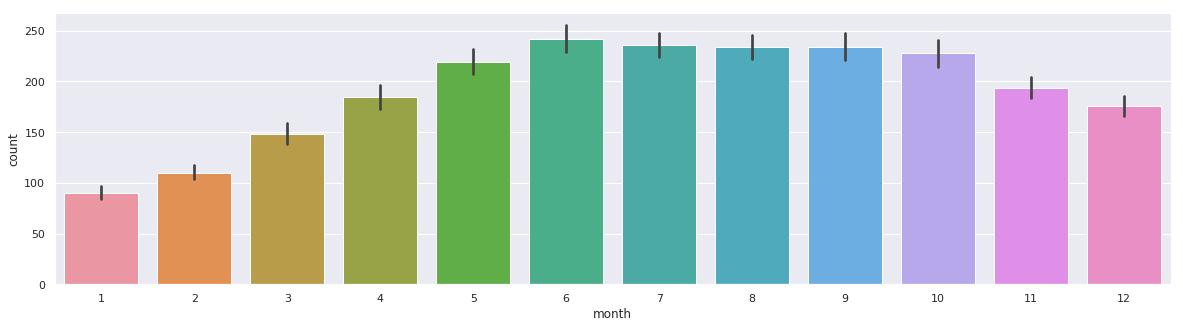

In [318]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=train['month'],y=train['count']);

The above plot explains the demand of the bicycle according to month.

**Data Transformation**

In [319]:
season = pd.get_dummies(train['season'],prefix='season')
train = pd.concat([train,season],axis=1)
season = pd.get_dummies(test['season'],prefix='season')
test = pd.concat([test,season],axis=1)

In [320]:
train.drop('season',axis=1,inplace=True)
train.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,season_1,season_2,season_3,season_4
0,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,1,0,0,0
1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,1,0,0,0
2,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,1,0,0,0
3,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,1,0,0,0
4,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,1,0,0,0


In [321]:
weather = pd.get_dummies(train['weather'],prefix='weather')

train = pd.concat([train,weather],axis=1)

train.drop('weather',axis=1,inplace=True)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,16,2011,1,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,40,2011,1,1,1,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,32,2011,1,1,2,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,13,2011,1,1,3,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,1,2011,1,1,4,1,0,0,0,1,0,0,0


In [322]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,1,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,1,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,1,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,1,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,1,0,0,0


In [323]:
test.drop('season',axis=1,inplace=True)

In [324]:
weather = pd.get_dummies(test['weather'],prefix='weather')

test = pd.concat([test,weather],axis=1)

test.drop('weather',axis=1,inplace=True)
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,10.66,11.365,56,26.0027,2011,1,20,0,1,0,0,0,1,0,0,0
1,0,1,10.66,13.635,56,0.0000,2011,1,20,1,1,0,0,0,1,0,0,0
2,0,1,10.66,13.635,56,0.0000,2011,1,20,2,1,0,0,0,1,0,0,0
3,0,1,10.66,12.880,56,11.0014,2011,1,20,3,1,0,0,0,1,0,0,0
4,0,1,10.66,12.880,56,11.0014,2011,1,20,4,1,0,0,0,1,0,0,0


**Splitting data into Train and Test split**

In [325]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('uint8'): Index(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
        'weather_2', 'weather_3', 'weather_4'],
       dtype='object'),
 dtype('int64'): Index(['holiday', 'workingday', 'humidity', 'count', 'year', 'month', 'day',
        'hour'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'windspeed'], dtype='object')}

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [327]:
X = train.drop('count',axis=1)
y = train['count']
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
test=sc.fit_transform(test)

**Model Building**

In [328]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_rf = rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test,y_pred_rf))

0.3569387261226886

The above Random Forest model is using default parameter of the Random forest model to reduse RMSLE more we will do hyperparameter tuning the parameters considered are listed below

In [329]:
n_estimators = [int(x) for x in range(200,2000,100)]
max_feature = ['auto','sqrt']
min_sample_split = [2,5,10]
min_sample_leaf = [1,2,4]
max_depth = [int(x) for x in range(10,110,11)]
max_depth.append(None)

In [330]:
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_features': max_feature,
              'min_samples_leaf': min_sample_leaf,
              'min_samples_split': min_sample_split}

In [331]:
random_grid

{'n_estimators': [200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900],
 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 109, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

Now we will find the optimal solution using RandomizedSearchCV, the estimator will be Random Forest and parameters will be all the parameters in random_grid

In [332]:
rf_tune = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_tune,param_distributions=random_grid,n_iter=100,cv=5,verbose= 2,n_jobs=-1)

by running **rf_random(X_train,y_train)** we will get the optimal parameter as below

* max_depth=87
* max_features='auto'
* min_samples_leaf=1
* min_samples_split=2
* n_estimators=1300

now we will make final Random forest model with hyperparameters

In [333]:
final_rf = RandomForestRegressor(max_depth=87,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=1300)
final_model_rf = final_rf.fit(X_train,y_train)
y_final_pred = final_model_rf.predict(X_test)
np.sqrt(mean_squared_log_error(y_test,y_final_pred))

0.34174098103557715

In [334]:
X_test=pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.171490,0.684616,1.718488,1.946484,-0.149992,-1.567754,-1.003866,0.138930,1.644787,-0.078318,-0.572329,-0.578977,1.727185,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
1,5.831228,-1.460672,-2.070386,-1.986625,-0.409811,-0.832442,0.996149,-1.603121,1.096978,-0.801330,1.747245,-0.578977,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
2,-0.171490,-1.460672,-1.333661,-1.450292,-0.721594,0.024326,-1.003866,1.590639,0.183962,0.933897,-0.572329,-0.578977,-0.578977,1.726763,0.716677,-0.593264,-0.292692,-0.009585
3,-0.171490,0.684616,1.192256,1.231373,0.005900,0.024326,0.996149,0.429272,0.914374,-0.222921,-0.572329,-0.578977,1.727185,-0.579118,-1.395328,1.685590,-0.292692,-0.009585
4,-0.171490,0.684616,0.666023,0.873818,-0.461775,0.514260,0.996149,-0.151412,0.914374,1.656909,-0.572329,1.727185,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,-0.171490,-1.460672,0.455530,0.427168,-0.669630,0.759638,-1.003866,-0.441754,-0.363848,0.789295,-0.572329,1.727185,-0.578977,-0.579118,-1.395328,-0.593264,3.416559,-0.009585
2174,-0.171490,0.684616,-0.912675,-1.003643,0.213755,1.127293,0.996149,-1.603121,1.279581,-1.090534,1.747245,-0.578977,-0.578977,-0.579118,-1.395328,-0.593264,3.416559,-0.009585
2175,-0.171490,-1.460672,-0.491689,-0.377626,-1.137305,0.024326,0.996149,1.300297,-1.094260,0.355488,-0.572329,-0.578977,-0.578977,1.726763,0.716677,-0.593264,-0.292692,-0.009585
2176,-0.171490,-1.460672,-1.123168,-1.092737,0.993213,-0.710164,0.996149,-1.603121,-1.642070,-0.945932,1.747245,-0.578977,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585


In [335]:
y_final=final_model_rf.predict(test)

In [349]:
y_final=pd.DataFrame(y_final)

In [350]:
y_final=y_final.round()

In [356]:
y_final=y_final.astype(int)

In [357]:
y_final.describe()

,0
count,6493.000000
mean,193.514554
std,173.410980
min,1.000000
25%,52.000000
50%,153.000000
75%,289.000000
max,898.000000


In [358]:
y_final = pd.DataFrame(y_final)
y_final.to_csv('Bike_share.csv', index=False)

In [359]:
from IPython.display import FileLink
FileLink('Bike_share.csv')

/kaggle/working/Bike_share.csv

In [360]:
y_final.head()

,0
0,9
1,5
2,5
3,4
4,3
